In [1]:
# Model 1: Multivariate Linear Regression 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
pkl_file_name = "DF_Short_Listings.pkl"
# pkl_file_name = "DF_Long_Listings.pkl"

cmd = pd.read_pickle(pkl_file_name)


X = cmd.drop(["Sold $","MLS","Address","City","Zip","$/SF",\
              "List $","Sold Date","SP%LP","CDOM"], axis=1)
feature_names = X.columns
X.head()

,Beds,#Bath,#HlfBath,Gar,TCP,YB,Pool,SF,Acres
0,2,1,1,0,0,1984,1,930,5.909
1,2,1,0,0,0,1997,0,1008,0.116
2,3,2,0,0,0,2008,0,1348,0.165
3,3,1,0,0,0,1977,0,858,0.170
4,3,2,0,2,2,1986,0,1492,0.127


In [3]:
y = cmd["Sold $"].values.reshape(-1, 1)
print(X.shape, y.shape)

(249, 9) (249, 1)


In [4]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# "Sklearn provides a variety of scaling and normalization options. 
# The two most common are minmax and StandardScaler. 
# Use StandardScaler when you don't know anything about your data." 
# (what does that really mean???)

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\Michel Maniguet\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Michel Maniguet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Michel Maniguet\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Michel Maniguet\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Michel Maniguet\Anaconda3\li

In [6]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit Train model & calculate scores for training and testing
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

stat_string = f"MLR Scaled scores: train = {training_score:.4f}, test = {testing_score:.4f}\n"
print(stat_string)

MLR Scaled scores: train = 0.8363, test = 0.7216



In [8]:
stat_file_path = "stats/rempest_stats.txt"
with open(stat_file_path,"a") as stats_file:
    stats_file.write(stat_string)

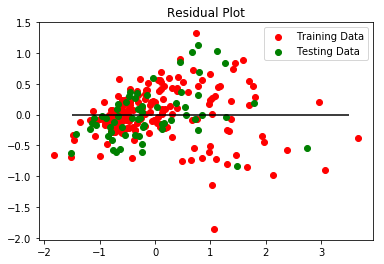

In [10]:
# Plot Training and Testing Residuals data

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="red", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="green", label="Testing Data")
plt.legend()
#plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.hlines(y=0, xmin=-1.5, xmax=3.5)
plt.title("Residual Plot")
plt.savefig('plots\MLR_scaled_residual_plot.png')
